In [1]:
import pandas as pd

In [2]:
#importing identified aca posts
posts = pd.read_csv('../data/processed/aca_posts_3.csv')

posts.head()

,Unnamed: 0,selftext,title,time_created,processed_text,processed_title,processed_title_no_stop
0,0,I am 20 years old and looking to get health in...,20 y/o Male. HSA Silver with Kaiser or Covered...,2021-05-10 18:13:16,20 years old looking get health insurance i'm ...,20 year old male hsa silver with kaiser or cov...,20 year old male hsa silver kaiser covered cal...
1,8,I'm transitioning from SSI (which automaticall...,SSDI waiting for medicare. ACA medicaid conflict,2021-05-10 03:02:01,i'm transitioning ssi automatically qualifies ...,ssdi waiting for medicare aca medicaid conflict,ssdi waiting medicare aca medicaid conflict
2,15,Propublica wrote an excellent article on the p...,The dangers of buying non-ACA compliant insura...,2021-05-09 01:22:14,propublica wrote excellent article pitfalls bu...,the dangers of buying non-aca compliant insura...,dangers buying non-aca compliant insurance plans
3,18,* Currently in our special enrollment period a...,Just married! Spouse is a.) *not* eligible for...,2021-05-08 01:45:27,currently special enrollment period wedding on...,just married spouse is a not eligible for aca ...,married spouse eligible aca medicaid b low inc...
4,22,Situation: my children’s mother is an addict. ...,Can you have Medicaid and an ACA plan? Need be...,2021-05-07 21:14:48,situation: children’s mother addict trying get...,can you have medicaid and an aca plan need bet...,medicaid aca plan need better rehab treatment


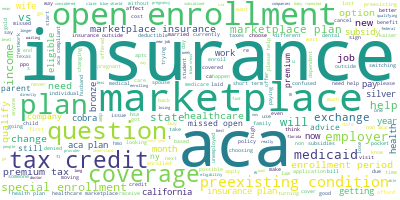

In [3]:
#now doing it for post titles
from wordcloud import WordCloud

#Join the different posts together.
long_string = ','.join(list(posts['processed_title'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

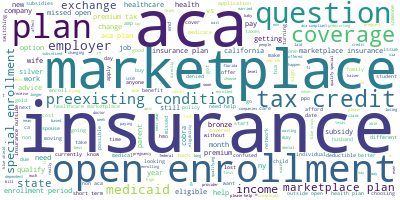

In [4]:
#now doing it for post titles
from wordcloud import WordCloud

#Join the different posts together.
long_string = ','.join(list(posts['processed_title_no_stop'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

C:\Users\madat\AppData\Local\Continuum\anaconda3\envs\aca-forum\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


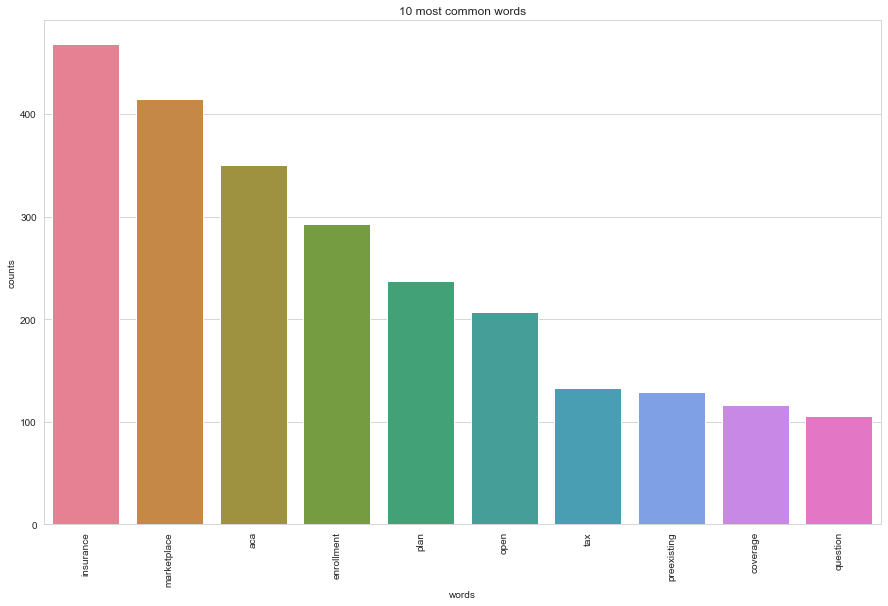

In [6]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_title'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

C:\Users\madat\AppData\Local\Continuum\anaconda3\envs\aca-forum\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


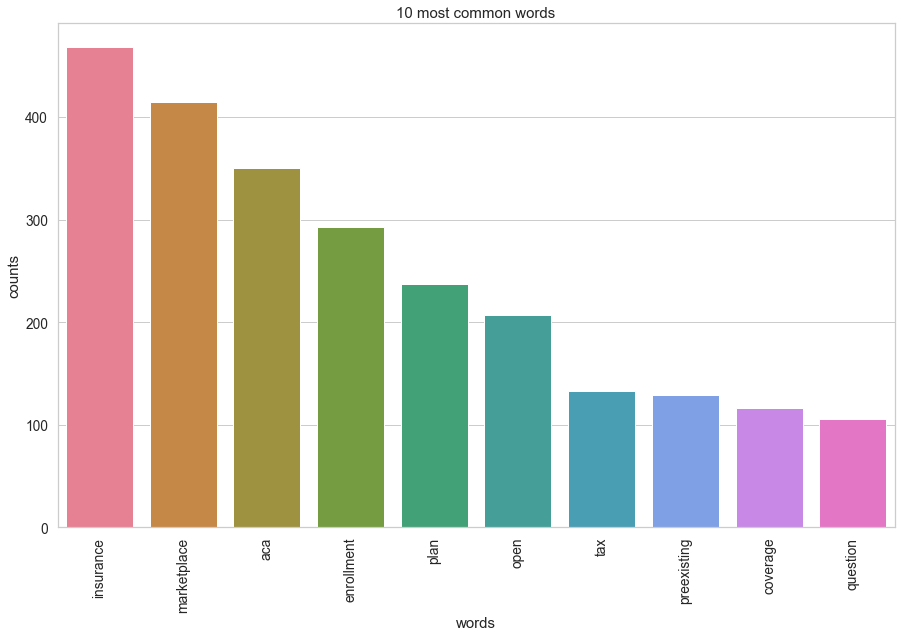

In [7]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_title_no_stop'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [8]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA


# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [9]:
number_words = 15

#topics = [5, 10, 20, 50, 100, 250]

topics = [5, 10, 15, 20, 25, 35, 50, 100]

for topic in topics:
    # Create and fit the LDA mode;
    print('With {} number of topics'.format(str(topic)))
    lda = LDA(n_components = topic, n_jobs=-1)
    lda.fit(count_data)
    
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    print('******************************************************************************************************************************')

With 5 number of topics
Topics found via LDA:

Topic #0:
marketplace aca insurance plan obamacare healthcare coverage cobra pay vs exchange 1095 qualify health help

Topic #1:
insurance health aca marketplace plan employer bronze vs ppo coverage obamacare plans california term gold

Topic #2:
insurance marketplace pre existing plan health condition conditions help new question state aca plans exchange

Topic #3:
enrollment open marketplace insurance special aca period question medicaid missed coverage plan job plans change

Topic #4:
tax credit insurance premium marketplace health income credits aca care affordable job question act year
******************************************************************************************************************************
With 10 number of topics
Topics found via LDA:

Topic #0:
pre existing condition conditions insurance credits aca question tax preexisting health coverage policy income self

Topic #1:
insurance marketplace aca health plan outsi

In [9]:
## trying with gensim

# lemmazation of titles

import nltk
#nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [10]:
posts['title_lemmatized'] = posts['processed_title'].apply(lemmatize_text)
posts['title_no_stop_lemmatized'] = posts['processed_title_no_stop'].apply(lemmatize_text)

posts.head()

,Unnamed: 0,selftext,title,time_created,processed_text,processed_title,processed_title_no_stop,title_lemmatized,title_no_stop_lemmatized
0,0,I am 20 years old and looking to get health in...,20 y/o Male. HSA Silver with Kaiser or Covered...,2021-05-10 18:13:16,20 years old looking get health insurance i'm ...,20 year old male hsa silver with kaiser or cov...,20 year old male hsa silver kaiser covered cal...,"[20, year, old, male, hsa, silver, with, kaise...","[20, year, old, male, hsa, silver, kaiser, cov..."
1,8,I'm transitioning from SSI (which automaticall...,SSDI waiting for medicare. ACA medicaid conflict,2021-05-10 03:02:01,i'm transitioning ssi automatically qualifies ...,ssdi waiting for medicare aca medicaid conflict,ssdi waiting medicare aca medicaid conflict,"[ssdi, waiting, for, medicare, aca, medicaid, ...","[ssdi, waiting, medicare, aca, medicaid, confl..."
2,15,Propublica wrote an excellent article on the p...,The dangers of buying non-ACA compliant insura...,2021-05-09 01:22:14,propublica wrote excellent article pitfalls bu...,the dangers of buying non-aca compliant insura...,dangers buying non-aca compliant insurance plans,"[the, danger, of, buying, non-aca, compliant, ...","[danger, buying, non-aca, compliant, insurance..."
3,18,* Currently in our special enrollment period a...,Just married! Spouse is a.) *not* eligible for...,2021-05-08 01:45:27,currently special enrollment period wedding on...,just married spouse is a not eligible for aca ...,married spouse eligible aca medicaid b low inc...,"[just, married, spouse, is, a, not, eligible, ...","[married, spouse, eligible, aca, medicaid, b, ..."
4,22,Situation: my children’s mother is an addict. ...,Can you have Medicaid and an ACA plan? Need be...,2021-05-07 21:14:48,situation: children’s mother addict trying get...,can you have medicaid and an aca plan need bet...,medicaid aca plan need better rehab treatment,"[can, you, have, medicaid, and, an, aca, plan,...","[medicaid, aca, plan, need, better, rehab, tre..."


In [ ]:
#removing any instance of aca, insurance or health i

In [11]:
# Bi and trigrams in the corpus


import gensim
from gensim.utils import simple_preprocess

texts = posts['processed_title'].values.tolist()

#tokenize words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

text_words = list(sent_to_words(texts))

print(text_words)

[['year', 'old', 'male', 'hsa', 'silver', 'with', 'kaiser', 'or', 'covered', 'california', 'with', 'financial', 'assistance'], ['ssdi', 'waiting', 'for', 'medicare', 'aca', 'medicaid', 'conflict'], ['the', 'dangers', 'of', 'buying', 'non', 'aca', 'compliant', 'insurance', 'plans'], ['just', 'married', 'spouse', 'is', 'not', 'eligible', 'for', 'aca', 'or', 'medicaid', 'has', 'very', 'low', 'income', 'and', 'is', 'currently', 'qualified', 'for', 'temporary', 'discount', 'for', 'hospital', 'services', 'adding', 'spouse', 'to', 'my', 'insurance', 'mo', 'before', 'copays', 'deductibles', 'etc', 'what', 'should', 'do', 'more', 'info', 'inside', 'thank', 'you'], ['can', 'you', 'have', 'medicaid', 'and', 'an', 'aca', 'plan', 'need', 'better', 'rehab', 'treatment'], ['how', 'come', 'the', 'marketplace', 'is', 'always', 'unavailable'], ['haven', 'had', 'insurance', 'in', 'years', 'need', 'help', 'tax', 'credit'], ['marketplace', 'coverage', 'vs', 'medicaid'], ['looking', 'for', 'marketplace', 'i

In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(text_words, min_count=5, threshold=50) 
trigram = gensim.models.Phrases(bigram[text_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [13]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

text_words_no_stop = remove_stopwords(text_words)

text_bigrams = make_bigrams(text_words_no_stop)

def lemmatization(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

text_lemmatized = lemmatization(text_bigrams)

print(text_lemmatized)

[['year', 'old', 'male', 'hsa', 'silver', 'kaiser', 'cover', 'california', 'financial', 'assistance'], ['ssdi', 'waiting', 'medicare', 'aca', 'medicaid', 'conflict'], ['danger', 'buy', 'non', 'aca', 'compliant', 'insurance', 'plan'], ['married', 'spouse', 'eligible', 'aca', 'medicaid', 'low', 'income', 'currently', 'qualified', 'temporary', 'discount', 'hospital', 'service', 'add', 'spouse', 'insurance', 'mo', 'copay', 'deductible', 'etc', 'info', 'inside', 'thank'], ['medicaid', 'aca', 'plan', 'need', 'well', 'rehab', 'treatment'], ['come', 'marketplace', 'always', 'unavailable'], ['insurance', 'year', 'need', 'help', 'tax_credit'], ['marketplace', 'coverage', 'vs', 'medicaid'], ['look', 'marketplace', 'insurance', 'need', 'help'], ['estimate', 'income', 'aca'], ['question', 'regard', 'medicaid', 'marketplace', 'aptc'], ['stay', 'parent', 'marketplace', 'plan'], ['marketplace', 'insurance'], ['opt', 'use', 'husband', 'employer', 'sponsor', 'insurance', 'vs', 'marketplace'], ['clawback

In [15]:
text_trigrams = make_trigrams(text_words_no_stop)

trigrams_lemmatized = lemmatization(text_trigrams)

print(trigrams_lemmatized)

[['year', 'old', 'male', 'hsa', 'silver', 'kaiser', 'cover', 'california', 'financial', 'assistance'], ['ssdi', 'waiting', 'medicare', 'aca', 'medicaid', 'conflict'], ['danger', 'buy', 'non', 'aca', 'compliant', 'insurance', 'plan'], ['married', 'spouse', 'eligible', 'aca', 'medicaid', 'low', 'income', 'currently', 'qualified', 'temporary', 'discount', 'hospital', 'service', 'add', 'spouse', 'insurance', 'mo', 'copay', 'deductible', 'etc', 'info', 'inside', 'thank'], ['medicaid', 'aca', 'plan', 'need', 'well', 'rehab', 'treatment'], ['come', 'marketplace', 'always', 'unavailable'], ['insurance', 'year', 'need', 'help', 'tax_credit'], ['marketplace', 'coverage', 'vs', 'medicaid'], ['look', 'marketplace', 'insurance', 'need', 'help'], ['estimate', 'income', 'aca'], ['question', 'regard', 'medicaid', 'marketplace', 'aptc'], ['stay', 'parent', 'marketplace', 'plan'], ['marketplace', 'insurance'], ['opt', 'use', 'husband', 'employer', 'sponsor', 'insurance', 'vs', 'marketplace'], ['clawback

In [16]:
import gensim.corpora as corpora

#Create Dictionary
id2word = corpora.Dictionary(text_lemmatized)
#Create Corpus
full_texts = text_lemmatized
#Term Document Frequency
corpus = [id2word.doc2bow(text) for text in full_texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [17]:
## looping through different number of topics
coherence = []

#looping through 5 to 30 topics
for i in range(3,41):
    print('Round: {}'.format(i))

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=lda_model, texts=text_lemmatized,\
         dictionary=id2word, coherence='c_v')   
                                                
    coherence.append([i,cm.get_coherence()])
    print(cm.get_coherence())

print(coherence)

Round: 3
0.25439306507011006
Round: 4
0.2601872002869578
Round: 5
0.24193632712275798
Round: 6
0.23319697867269296
Round: 7
0.2515143820595625
Round: 8
0.25623634413870156
Round: 9
0.28405122865144594
Round: 10
0.27743213404784217
Round: 11
0.27570011734966376
Round: 12
0.2635660574894207
Round: 13
0.2840170236699721
Round: 14
0.28060457176091946
Round: 15
0.29808599107044026
Round: 16
0.2848122244991831
Round: 17
0.29658919445768234
Round: 18
0.2941064115938417
Round: 19
0.28110134102333434
Round: 20
0.3241695971341592
Round: 21
0.3419518784378398
Round: 22
0.3181292719232544
Round: 23
0.33623124631203727
Round: 24
0.33945499865388834
Round: 25
0.3130417537474819
Round: 26
0.3422005163042498
Round: 27
0.344448671627874
Round: 28
0.3547851453782048
Round: 29
0.34529011643756846
Round: 30
0.34951060136378415
Round: 31
0.3548851927755377
Round: 32
0.3317259098761335
Round: 33
0.35241394921404334
Round: 34
0.34237510114866376
Round: 35
0.35271716161346434
Round: 36
0.349674356032495
Round

Text(0.5, 1.0, 'Number of Topics vs Coherence')

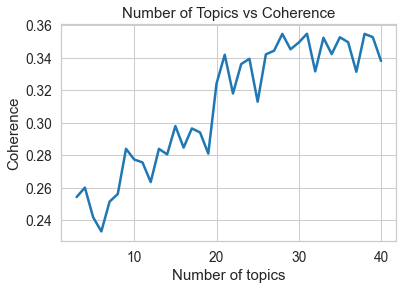

In [18]:
x,y = zip(*coherence)

plt.plot(x,y)
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Number of Topics vs Coherence')

Round: 3
0.2841135862141401
Round: 4
0.24416658296180038
Round: 5
0.2602708033624237
Round: 6
0.28231268038437807
Round: 7
0.29503331135146454
Round: 8
0.3204282681918227
Round: 9
0.293671620805886
Round: 10
0.28531750254055677
Round: 11
0.29682374490983365
Round: 12
0.31312745752017296
Round: 13
0.34262726869265675
Round: 14
0.3661978326886948
Round: 15
0.35393657360438435
Round: 16
0.3690198317247637
Round: 17
0.4012692817078857
Round: 18
0.37095495040811494
Round: 19
0.3681516857358868
Round: 20
0.40258220652897964
Round: 21
0.3953553231378989
Round: 22
0.39721053567821135
Round: 23
0.38714052636914015
Round: 24
0.3949184082756188
Round: 25
0.402013416108463
Round: 26
0.39724397989391314
Round: 27
0.3936083966757558
Round: 28
0.416537364149809
Round: 29
0.3709849519672095
Round: 30
0.4148714748795461
Round: 31
0.4107980671812911
Round: 32
0.4220081350215441
Round: 33
0.4168717705882228
Round: 34
0.3992460944329296
Round: 35
0.39135305888574506
Round: 36
0.4073492670294166
Round: 37


Text(0.5, 1.0, 'Number of Topics vs Coherence with a chunk size of 50')

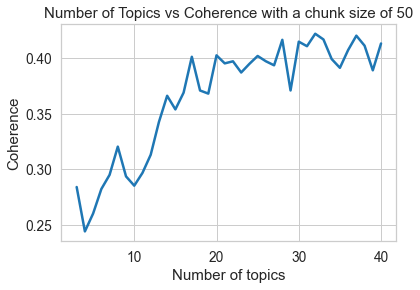

In [19]:
# attempting different chunk sizes

#chunk size of 50
## looping through different number of topics
coherence_chunks = []

#looping through 5 to 30 topics
for i in range(3,41):
    print('Round: {}'.format(i))

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=50,
                                       passes=10,
                                       per_word_topics=True)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=lda_model, texts=text_lemmatized,\
         dictionary=id2word, coherence='c_v')   
                                                
    coherence_chunks.append([i,cm.get_coherence()])
    print(cm.get_coherence())

print(coherence_chunks)

x,y = zip(*coherence_chunks)

plt.plot(x,y)
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Number of Topics vs Coherence with a chunk size of 50')

Round: 3
0.24716797347995792
Round: 4
0.2503295863415913
Round: 5
0.280027196195884
Round: 6
0.2482672338509336
Round: 7
0.2932494671308459
Round: 8
0.2689931913914283
Round: 9
0.2834932116741801
Round: 10
0.2972560015799986
Round: 11
0.29249660384771164
Round: 12
0.29594550578828266
Round: 13
0.28345644586990015
Round: 14
0.30155216163215376
Round: 15
0.30794399949883716
Round: 16
0.3106025798438018
Round: 17
0.3265638938605815
Round: 18
0.3055001967555927
Round: 19
0.31678684464851903
Round: 20
0.32246281360020435
Round: 21
0.33849101801954873
Round: 22
0.3396040489926338
Round: 23
0.35723297905402
Round: 24
0.33559648479001064
Round: 25
0.3470605726252744
Round: 26
0.35954982052388745
Round: 27
0.3432700610678661
Round: 28
0.34249602009144914
Round: 29
0.33294381567661857
Round: 30
0.337025218849101
Round: 31
0.3419599130653134
Round: 32
0.34772446649727884
Round: 33
0.34425946726402024
Round: 34
0.3490186687787821
Round: 35
0.34328506047006724
Round: 36
0.34186208755576386
Round: 3

Text(0.5, 1.0, 'Number of Topics vs Coherence with a chunk size of 150')

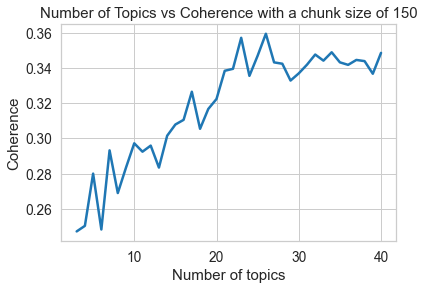

In [20]:
#chunk size of 150
## looping through different number of topics
coherence_chunks = []

#looping through 5 to 30 topics
for i in range(3,41):
    print('Round: {}'.format(i))

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=150,
                                       passes=10,
                                       per_word_topics=True)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=lda_model, texts=text_lemmatized,\
         dictionary=id2word, coherence='c_v')   
                                                
    coherence_chunks.append([i,cm.get_coherence()])
    print(cm.get_coherence())

print(coherence_chunks)

x,y = zip(*coherence_chunks)

plt.plot(x,y)
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Number of Topics vs Coherence with a chunk size of 150')

In [21]:
## Eight topics seems to be the optimal amount, afterwards it seems like there are subtopics are being detected
lda_model_eight = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       chunksize=50,
                                       passes=10,
                                       per_word_topics=True)

lda_model_eight.print_topics()

[(0,
  '0.053*"premium" + 0.044*"tax_credit" + 0.041*"marketplace" + 0.036*"help" + 0.034*"tax" + 0.033*"credit" + 0.030*"pay" + 0.022*"insurance" + 0.018*"question" + 0.017*"income"'),
 (1,
  '0.046*"aca" + 0.028*"enrollment" + 0.027*"plan" + 0.026*"open" + 0.019*"switch" + 0.018*"marketplace" + 0.015*"good" + 0.015*"obamacare" + 0.014*"insurance" + 0.013*"income"'),
 (2,
  '0.117*"insurance" + 0.080*"health" + 0.045*"plan" + 0.031*"enrollment" + 0.030*"aca" + 0.027*"marketplace" + 0.025*"open" + 0.024*"get" + 0.017*"employer" + 0.016*"new"'),
 (3,
  '0.080*"marketplace" + 0.055*"insurance" + 0.038*"plan" + 0.030*"get" + 0.027*"aca" + 0.024*"health" + 0.017*"healthcare" + 0.017*"employer" + 0.014*"income" + 0.014*"option"'),
 (4,
  '0.075*"condition" + 0.041*"pre_existing" + 0.039*"pre_existe" + 0.032*"insurance" + 0.026*"aca" + 0.025*"coverage" + 0.022*"short_term" + 0.020*"california" + 0.019*"marketplace" + 0.016*"know"'),
 (5,
  '0.074*"enrollment" + 0.064*"special" + 0.051*"vs" +

In [18]:
id2word_trigrams = corpora.Dictionary(trigrams_lemmatized)
trigram_texts = trigrams_lemmatized

corpus_trigram = [id2word_trigrams.doc2bow(text) for text in trigram_texts]

Round: 3
0.43223459758382404
Round: 4
0.46042184879096776
Round: 5
0.44083091047377476
Round: 6
0.4656726424421938
Round: 7
0.46319974647830986
Round: 8
0.44159376941545087
Round: 9
0.4526814336062752
Round: 10
0.46182328909069936
Round: 11
0.47882511951768875
Round: 12
0.4772763879216346
Round: 13
0.4729924662432111
Round: 14
0.5005822178360103
Round: 15
0.5002804849301055
Round: 16
0.49508832906510464
Round: 17
0.5186392302230991
Round: 18
0.5048787133693411
Round: 19
0.49138906662270637
Round: 20
0.5101259730836343
Round: 21
0.5118094023937876
Round: 22
0.506268493768602
Round: 23
0.519944304381565
Round: 24
0.5256741590200573
Round: 25
0.5127684259409603
Round: 26
0.5104861928947222
Round: 27
0.5339149819486991
Round: 28
0.5429474996190088
Round: 29
0.5233644056012391
[[3, 0.43223459758382404], [4, 0.46042184879096776], [5, 0.44083091047377476], [6, 0.4656726424421938], [7, 0.46319974647830986], [8, 0.44159376941545087], [9, 0.4526814336062752], [10, 0.46182328909069936], [11, 0.47

Text(0.5, 1.0, 'Number of Topics vs Coherence with trigrams')

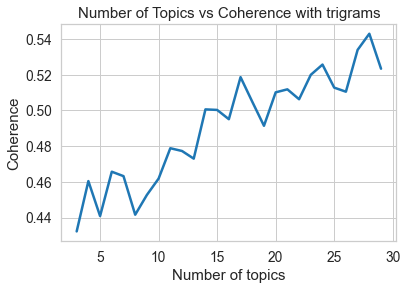

In [39]:
## looping through different number of topics
coherence_trigram = []

#looping through 5 to 30 topics
for i in range(3,30):
    print('Round: {}'.format(i))

    lda_model = gensim.models.LdaMulticore(corpus=corpus_trigram,
                                       id2word=id2word_trigrams,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=lda_model, texts=trigrams_lemmatized,\
         dictionary=id2word, coherence='c_v')   
                                                
    coherence_trigram.append([i,cm.get_coherence()])
    print(cm.get_coherence())

print(coherence_trigram)

x,y = zip(*coherence_trigram)

plt.plot(x,y)
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Number of Topics vs Coherence with trigrams')

In [40]:
## okay I think 6 topics is the best now

lda_model_trigrams = gensim.models.LdaMulticore(corpus=corpus_trigram,
                                       id2word=id2word_trigrams,
                                       num_topics=6, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

lda_model_trigrams.print_topics()

[(0,
  '0.040*"insurance" + 0.038*"tax_credit" + 0.037*"marketplace" + 0.025*"aca" + 0.016*"state" + 0.015*"income" + 0.014*"eligible" + 0.013*"get" + 0.013*"health" + 0.012*"medicaid"'),
 (1,
  '0.116*"enrollment" + 0.083*"open" + 0.040*"insurance" + 0.029*"special" + 0.024*"aca" + 0.022*"period" + 0.020*"miss" + 0.016*"get" + 0.014*"coverage" + 0.013*"outside"'),
 (2,
  '0.063*"aca" + 0.046*"get" + 0.044*"insurance" + 0.029*"plan" + 0.020*"medicaid" + 0.017*"marketplace" + 0.016*"enrollment" + 0.012*"qualify" + 0.011*"question" + 0.010*"compliant"'),
 (3,
  '0.051*"insurance" + 0.047*"aca" + 0.046*"marketplace" + 0.041*"plan" + 0.033*"preexisting_condition" + 0.020*"coverage" + 0.018*"job" + 0.014*"need" + 0.014*"employer" + 0.011*"new"'),
 (4,
  '0.034*"aca" + 0.028*"premium_tax_credit" + 0.025*"marketplace" + 0.021*"premium" + 0.018*"plan" + 0.013*"income" + 0.011*"make" + 0.011*"help" + 0.011*"pay" + 0.011*"insurance"'),
 (5,
  '0.082*"marketplace" + 0.058*"insurance" + 0.050*"pla

In [19]:
## what about 4 topics is the best now

lda_model_trigrams_four = gensim.models.LdaMulticore(corpus=corpus_trigram,
                                       id2word=id2word_trigrams,
                                       num_topics=4, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

lda_model_trigrams_four.print_topics()

[(0,
  '0.035*"marketplace" + 0.032*"insurance" + 0.027*"tax_credit" + 0.026*"aca" + 0.019*"get" + 0.018*"state" + 0.016*"plan" + 0.012*"california" + 0.011*"medicaid" + 0.010*"silver"'),
 (1,
  '0.098*"enrollment" + 0.069*"open" + 0.035*"insurance" + 0.026*"special" + 0.024*"aca" + 0.020*"period" + 0.016*"miss" + 0.016*"coverage" + 0.015*"plan" + 0.014*"exchange"'),
 (2,
  '0.060*"aca" + 0.043*"plan" + 0.035*"insurance" + 0.027*"marketplace" + 0.020*"get" + 0.012*"subsidy" + 0.011*"premium_tax_credit" + 0.010*"question" + 0.010*"pay" + 0.009*"year"'),
 (3,
  '0.078*"marketplace" + 0.067*"insurance" + 0.042*"plan" + 0.030*"aca" + 0.026*"preexisting_condition" + 0.019*"question" + 0.014*"get" + 0.014*"need" + 0.013*"coverage" + 0.012*"employer"')]

In [20]:
## what about 3 topics is the best now

lda_model_trigrams_three = gensim.models.LdaMulticore(corpus=corpus_trigram,
                                       id2word=id2word_trigrams,
                                       num_topics=3, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

lda_model_trigrams_three.print_topics()

[(0,
  '0.054*"marketplace" + 0.052*"insurance" + 0.026*"aca" + 0.020*"tax_credit" + 0.019*"plan" + 0.015*"coverage" + 0.014*"state" + 0.013*"get" + 0.011*"income" + 0.009*"medicaid"'),
 (1,
  '0.066*"enrollment" + 0.047*"open" + 0.034*"aca" + 0.034*"insurance" + 0.022*"marketplace" + 0.021*"question" + 0.017*"special" + 0.015*"plan" + 0.014*"period" + 0.014*"coverage"'),
 (2,
  '0.054*"plan" + 0.046*"insurance" + 0.041*"aca" + 0.038*"marketplace" + 0.024*"get" + 0.014*"enrollment" + 0.013*"preexisting_condition" + 0.009*"new" + 0.009*"open" + 0.009*"help"')]